Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


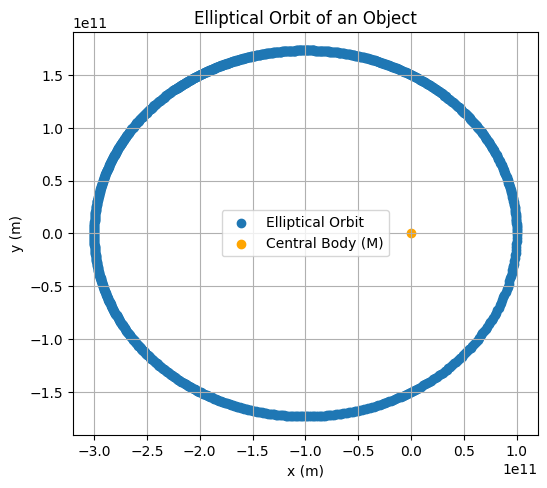

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
G = 6.67430e-11  # Gravitational constant in m^3 kg^-1 s^-2

def kepler_equation(E, M, m, e, t, a):
    """ Kepler's equation solver using Newton's method to find the eccentric anomaly (E) """
    n = np.sqrt(G * (M + m) / a**3)  # Mean motion
    return E - e * np.sin(E) - n * t

def elliptical_orbit(times, r0, M, m, e):
    """ Returns the positions of the orbiting object in an elliptical orbit at given times """
    a = r0 / (1 - e)  # Semi-major axis, assuming r0 is periapsis
    positions = []

    for t in times:
        # Initial guess for the eccentric anomaly (E)
        E_guess = t
        # Use Newton's method to solve Kepler's equation for E
        E = E_guess
        for _ in range(100):
            E = E - kepler_equation(E, M, m, e, t, a) / (1 - e * np.cos(E))
        
        # Compute the true anomaly (theta) from E
        theta = 2 * np.arctan(np.sqrt((1 + e) / (1 - e)) * np.tan(E / 2))

        # Calculate the radius at this anomaly
        r = a * (1 - e**2) / (1 + e * np.cos(theta))

        # Calculate the position (x, y) in polar coordinates
        x = r * np.cos(theta)
        y = r * np.sin(theta)

        positions.append((x, y))
    
    return positions

# Parameters
r0 = 1.0e11  # periapsis in meters (e.g., 1 AU)
M = 1.989e30  # mass of the central body (e.g., Sun) in kg
m = 5.972e24  # mass of the orbiting body (e.g., Earth) in kg
e = 0.5  # orbital eccentricity
times = 2 * np.linspace(0, 3.154e7, 1000)  # 1 year of orbital time in seconds

# Calculate the orbital positions
positions = elliptical_orbit(times, r0, M, m, e)

# Extract x and y coordinates for plotting
x_coords, y_coords = zip(*positions)

# Plot the orbit
plt.figure(figsize=(6,6))
plt.scatter(x_coords, y_coords, label="Elliptical Orbit")
plt.scatter(0, 0, color='orange', label="Central Body (M)")
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.title("Elliptical Orbit of an Object")
plt.legend()
plt.grid(True)
plt.show()
